In [3]:
from datasketches import *
import pandas as pd
import base64

In [4]:
deserialize_kll = lambda x : kll_floats_sketch.deserialize(base64.b64decode(x))

df = pd.read_csv("1hr.kll.k140.txt",
                 sep="\t",
                 header=None,
                 names=['pty','device','kll'],
                 dtype={'pty':'category', 'device':'category'},
                 converters={'kll':deserialize_kll}
                )

In [5]:
df

,pty,device,kll
0,mail,mobile,### KLL sketch summary:\n K : 1...
1,mail,desktop,### KLL sketch summary:\n K : 1...
2,news,mobile,### KLL sketch summary:\n K : 1...
3,news,desktop,### KLL sketch summary:\n K : 1...
4,sports,mobile,### KLL sketch summary:\n K : 1...
5,sports,desktop,### KLL sketch summary:\n K : 1...
6,finance,mobile,### KLL sketch summary:\n K : 1...
7,finance,desktop,### KLL sketch summary:\n K : 1...
8,front-page,mobile,### KLL sketch summary:\n K : 1...
9,front-page,desktop,### KLL sketch summary:\n K : 1...


In [6]:
query_result = kll_floats_sketch(140)
for sk in df.loc[df['pty'] != 'news'].itertuples(index=False):
    query_result.merge(sk.kll)
print(query_result)

### KLL sketch summary:
   K              : 140
   min K          : 140
   M              : 8
   N              : 8651479
   Epsilon        : 1.88%
   Epsilon PMF    : 2.31%
   Empty          : false
   Estimation mode: true
   Levels         : 16
   Sorted         : false
   Capacity items : 466
   Retained items : 345
   Storage bytes  : 1472
   Min value      : 0
   Max value      : 5.38e+03
### End sketch summary



In [7]:
#xmin = query_result.get_min_value()
#xmax = query_result.get_max_value()
xmin = 0.001
xmax = query_result.get_quantile(0.95)
num_splits = 50
step = (xmax - xmin) / num_splits
splits = [0.001 + (i*step) for i in range(0, num_splits)]

In [8]:
pmf = query_result.get_pmf(splits)
x = splits.copy()
x.append(xmax)

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

<BarContainer object of 51 artists>

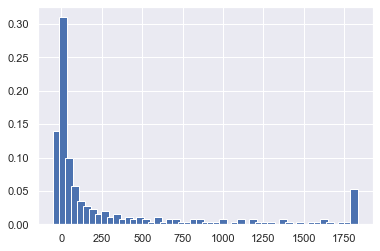

In [10]:
fig, ax = plt.subplots()
plt.bar(x=x, height=pmf, align='edge', width=-50)
#ax.set_xscale('log')

In [11]:
num_splits = 50
logstep = np.log10(xmax - 1.0) / num_splits
logsplits = [1.0 + (i*logstep) for i in range(0, num_splits)]

In [12]:
pmf = query_result.get_pmf(np.power(logsplits,10))
logx = logsplits.copy()
logx.append(xmax)

<BarContainer object of 51 artists>

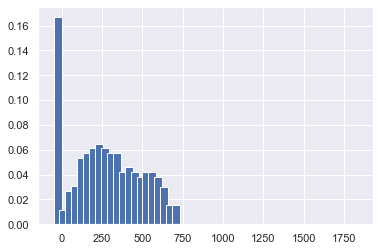

In [13]:
fig, ax = plt.subplots()
plt.bar(x=x, height=pmf, align='edge', width=-50)

In [14]:
kll = kll_floats_sketch(140)
for i in range(0,100000):
    kll.update(np.random.exponential())
xmin = kll.get_min_value()
xmax = kll.get_max_value()
step = (xmax - xmin) / 50
splits = [xmin + (i*step) for i in range(0,50)]
x = splits.copy()
x.append(xmax)

<BarContainer object of 51 artists>

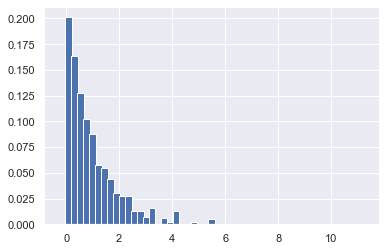

In [15]:
pmf = kll.get_pmf(splits)
plt.bar(x=x,height=pmf,align='edge',width=-.25)

In [16]:
x = [i for i in range(-10,11)]

In [17]:
y = np.multiply(x,x)

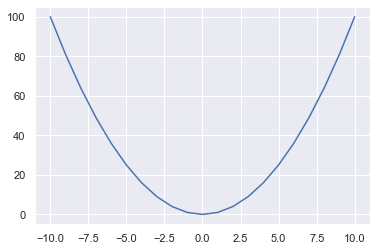

In [18]:
plt.plot(x,y)

In [67]:
kll = kll_floats_sketch(160)

In [68]:
kll.update(np.random.poisson(lam=2.0,size=2**20))
kll.update(np.random.poisson(lam=20.0,size=2**22))

<BarContainer object of 61 artists>

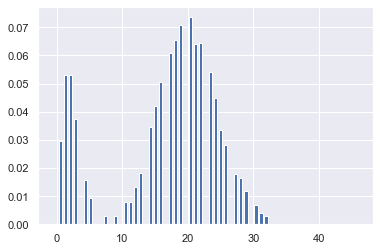

In [75]:
xmin = kll.get_min_value()
xmax = kll.get_max_value()
num_steps = 60
step = (xmax - xmin) / num_steps
splits = [xmin + (i*step) for i in range(0,num_steps)]
x = splits.copy()
x.append(xmax)
pmf = kll.get_pmf(splits)
plt.bar(x=x,height=pmf,align='edge',width=-.5)